In [1]:
from parse import parse
import numpy as np
import matplotlib.pyplot as plt
from aocd import get_data

In [2]:
data = get_data(year=2018, day=10)

In [3]:
test = """position=< 9,  1> velocity=< 0,  2>
position=< 7,  0> velocity=<-1,  0>
position=< 3, -2> velocity=<-1,  1>
position=< 6, 10> velocity=<-2, -1>
position=< 2, -4> velocity=< 2,  2>
position=<-6, 10> velocity=< 2, -2>
position=< 1,  8> velocity=< 1, -1>
position=< 1,  7> velocity=< 1,  0>
position=<-3, 11> velocity=< 1, -2>
position=< 7,  6> velocity=<-1, -1>
position=<-2,  3> velocity=< 1,  0>
position=<-4,  3> velocity=< 2,  0>
position=<10, -3> velocity=<-1,  1>
position=< 5, 11> velocity=< 1, -2>
position=< 4,  7> velocity=< 0, -1>
position=< 8, -2> velocity=< 0,  1>
position=<15,  0> velocity=<-2,  0>
position=< 1,  6> velocity=< 1,  0>
position=< 8,  9> velocity=< 0, -1>
position=< 3,  3> velocity=<-1,  1>
position=< 0,  5> velocity=< 0, -1>
position=<-2,  2> velocity=< 2,  0>
position=< 5, -2> velocity=< 1,  2>
position=< 1,  4> velocity=< 2,  1>
position=<-2,  7> velocity=< 2, -2>
position=< 3,  6> velocity=<-1, -1>
position=< 5,  0> velocity=< 1,  0>
position=<-6,  0> velocity=< 2,  0>
position=< 5,  9> velocity=< 1, -2>
position=<14,  7> velocity=<-2,  0>
position=<-3,  6> velocity=< 2, -1>"""

# Part 1

In [4]:
template = "position=<{:d}, {:d}> velocity=<{:d}, {:d}>"

def prs(line):
    return parse(template, line).fixed

def prs_data(data):
    a = np.array([*map(prs, data.splitlines())])
    pos = a[:, :-2][:, ::-1]
    vel = a[:, -2:][:, ::-1]
    
    return pos, vel

In [5]:
def get_containing_area(p):    
    return np.product(p.max(0) - p.min(0))

def part1(data):
    p0, v = prs_data(data)
    
    a0 = a1 = get_containing_area(p0)
    sec = 0
    p = p0.copy()
    while True:
        if a1 > a0:
            sec -= 1
            p -= v
            print(sec)
            p -= p.min(0)
            n, m = p.max(0) + 1
            c = np.zeros((n, m), int)
            np.add.at(c, tuple(p.T), 1)
            plt.imshow(c)
            plt.show()
            break
        else:
            sec += 1
            p += v
            a0 = a1
            a1 = get_containing_area(p)

10886


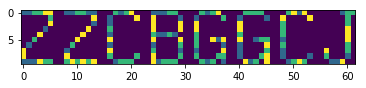

In [6]:
part1(data)

3


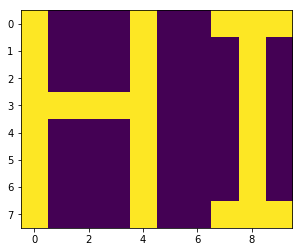

In [7]:
part1(test)